In [ ]:
import pandas as pd
import numpy as np
import os

def load_data():
  # get flie list from the directory /data
  file_list = os.listdir('data')
  # create a file specific named dataframes for each file
  for file in file_list:
    globals()[file.split('.')[0]] = pd.read_pickle('data/' + file)

load_data() 

In [ ]:
# display(new_programmers)


In [ ]:
# jobplanet, jumpit, programmers, rocketpunch 순서
# ======================================================
# 회사명:    company_name        (name, companyName, company_name, company_name)
# 직무명:    title               (title, title, title, job_title)
# 경력:      career              (recruitment_text, [minCarrer, maxCarrer], career, experienceRequirements)
# 기간:      date                (deadline_message, closedAt, period, validThrough(NaN인 경우 상시인듯))
# 기술스택:  tech_stack           (skills, techStacks, reqired_skills, specialties)
# 직무소개:  description          (primary_responsibility, responsibility, description, description(중복된 이름 가진 컬럼 존재))
# 기업소개:  company_description  (introduction, serviceInfo, company['serviceName'], description(상기된 중복이름 컬럼 중 하나))
# 자격요건:  required             (required_qualification, qualifications, requirement, requirement)
# 우대사항:  preferred_skill      (preferred_skill, preferredRequirements, preferredExperience, 없음)
# 복지및혜택: welfare             (benefit, welfares, additionalInformation, 없음)

In [ ]:
df_jp = jobplanet[['name', 'title', 'recruitment_text', 'deadline_message', 'skills', 'primary_responsibility', 'introduction', 'required_qualification', 'preferred_skill', 'benefit']]
df_jp.columns = ['company_name', 'title', 'career', 'date', 'tech_stack', 'description', 'company_description', 'required', 'preferred_skill', 'welfare']

jumpit['career_range'] = jumpit['minCareer'].astype(str) + '~' + jumpit['maxCareer'].astype(str)

df_ju = jumpit[['companyName', 'title', 'career_range', 'closedAt', 'techStacks', 'responsibility', 'serviceInfo', 'qualifications', 'preferredRequirements', 'welfares']]
df_ju.columns = ['company_name', 'title', 'career', 'date', 'tech_stack', 'description', 'company_description', 'required', 'preferred_skill', 'welfare']

new_programmers['company_desc'] = new_programmers['company'].apply(lambda x: x['serviceName'])

df_pr = new_programmers[['company_name', 'title', 'career', 'period', 'technicalTags', 'description', 'company_desc', 'requirement', 'preferredExperience', 'additionalInformation']]
df_pr.columns = ['company_name', 'title', 'career', 'date', 'tech_stack', 'description', 'company_description', 'required', 'preferred_skill', 'welfare']

rocketpunch_full.columns = ['company_id', 'company_name', 'company_desc', 'job_id', 'job_title','job_info', 'job_date', '@context', '@type', 'datePosted','description', 'hiringOrganization', 'title', 'url', 'jobLocation','employmentType', 'experienceRequirements', 'occupationalCategory','requirement', 'specialties', 'validThrough', 'baseSalary','jobLocationType']

df_rp = rocketpunch_full[['company_name', 'job_title', 'experienceRequirements', 'validThrough', 'specialties', 'description', 'company_desc', 'requirement']]
df_rp.columns = ['company_name', 'title', 'career', 'date', 'tech_stack', 'description', 'company_description', 'required']
df_rp['preferred_skill'] = np.nan
df_rp['welfare'] = np.nan

In [ ]:
display(df_jp.head(10))
display(df_ju.head(2))
display(df_pr.head(2))
display(df_rp.head(2))

In [ ]:
display(df_rp['description'].apply(lambda x: list(filter(None, re.split(r'(?=[\)\\|#])', x.replace('\n', ' ')))))[7])


In [28]:
import pymysql

db_info = {}
with open("db_info.env", "r") as f:
  for line in f:
    key, value = line.strip().split("=")
    db_info[key] = value

# connect to db
conn = pymysql.connect(
  host=db_info["DB_HOST"],
  user=db_info["DB_USER"],
  password=db_info["DB_PASS"],
  db=db_info["DB_NAME"],
  charset='utf8',
  cursorclass=pymysql.cursors.DictCursor  # Use DictCursor
)
cur = conn.cursor()

In [25]:
sql2 = """
  SELECT * FROM job_data;
  """
cur.execute(sql2)


1013

In [12]:
from faker import Faker
from datetime import date
import random

faker = Faker()
# Generate dummy data
dummy_data = []
for _ in range(10000):
  row = (
    random.randint(1, 4),  # First column as integer ranging from 1 to 4
    faker.company(),  # Second column as company name
    faker.job(),  # Third column as job title
    random.randint(0,10), # Fourth column as career
    str(faker.date_between(start_date='today', end_date='+1y')),  # Fifth column as date
    str(faker.random_elements(elements=('Python', 'Java', 'C++', 'JavaScript', 'Ruby', 'PHP', 'Swift', 'Kotlin', 'Go', 'Rust', 'Cobol', 'Fortran', 'Scala', 'Perl', 'R', 'Dart', 'TypeScript', 'HTML', 'CSS', 'SQL', 'NoSQL', 'MongoDB', 'PostgreSQL', 'MySQL', 'MariaDB', 'SQLite', 'Oracle', 'MS SQL', 'Redis', 'Elasticsearch', 'Kafka', 'RabbitMQ', 'ActiveMQ', 'ZeroMQ', 'NATS', 'Kubernetes', 'Docker', 'Vagrant', 'Ansible', 'Puppet', 'Chef', 'Salt', 'Jenkins', 'CircleCI', 'TravisCI', 'GitLabCI', 'GitHubActions', 'AWS', 'GCP', 'Azure', 'IBM Cloud', 'Alibaba Cloud', 'Oracle Cloud', 'DigitalOcean', 'Heroku', 'Netlify', 'Vercel', 'Firebase', 'Cloudflare', 'Nginx', 'Apache', 'IIS', 'Tomcat', 'Jetty', 'Node.js', 'Express.js', 'Hadoop', 'Spark'), length=3, unique=True)),
    faker.text(),  # Seventh column as description
    faker.text(),  # Eighth column as company description
    faker.text(),  # Ninth column as required qualification
  )
  dummy_data.append(row)

# insert dummy data
for data in dummy_data:
  cur.execute("INSERT INTO job_data_t (job_site_code, company_name, title, career, date_until, tech_stack, description, company_description, required) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s)", data)

conn.commit()

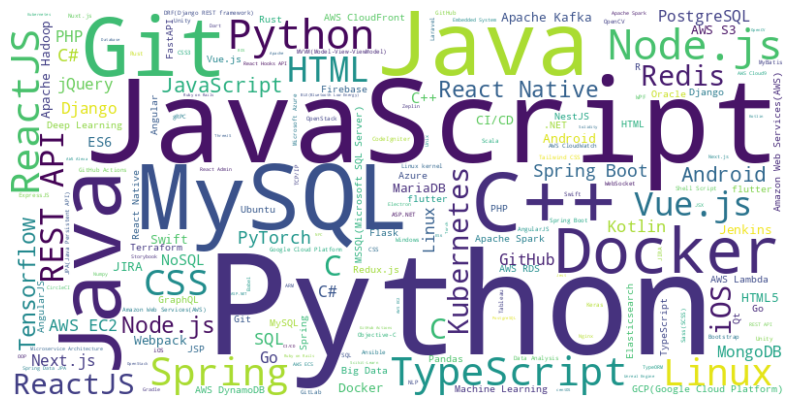

In [40]:
from collections import Counter
import re
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# import nltk
# nltk.download('stopwords')

# If you haven't downloaded the stopwords from NLTK, you need to do so
# import nltk
# nltk.download('stopwords')
word_count = Counter()

sql = """
    SELECT tech_stack
    FROM job_data
  """
cur.execute(sql)
rows = cur.fetchall()
for row in rows:
  # row = {'tech_stack': "Java, C++, Swift"}
  tech_stack = row['tech_stack']
  # extract words from tech_stack
  if tech_stack == None:
    continue
  else:
    words = tech_stack.split(',')
    for word in words:
      word_count[word] += 1

# draw a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_count)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()